
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.


<h2 style='color:darkblue; font-weight:bold;'>Import and explore the dataset</h2>

First 5 rows of the dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0    

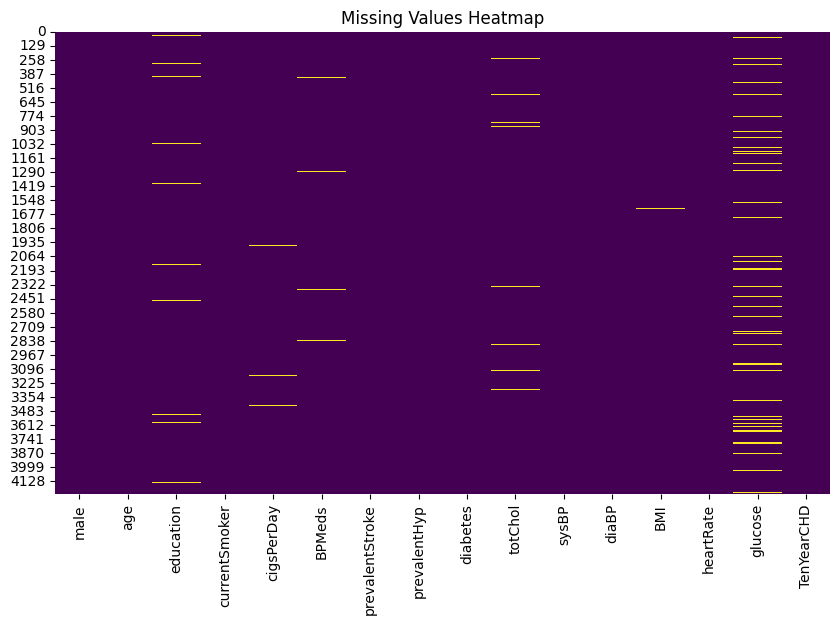

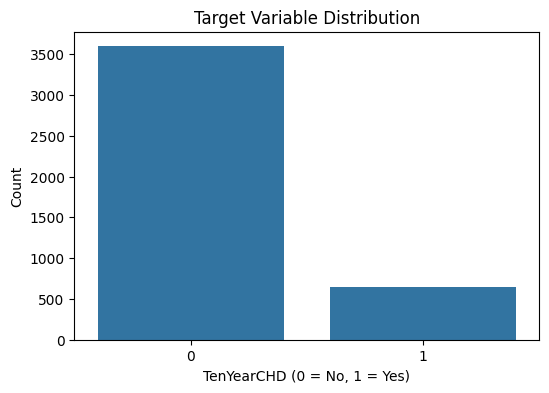

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('framingham.csv')

# Step 3: Display first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Basic info about dataset
print("\nDataset Information:")
print(df.info())

# Step 5: Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Step 6: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 7: Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Step 8: Plot the distribution of the target variable (assuming it's 'TenYearCHD')
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<h2 style='color:darkblue; font-weight:bold;'>clean the data,handle nulls,correct formats</h2>

In [3]:
# Step 9: Check missing values again
print("Missing values before cleaning:")
print(df.isnull().sum())

# Step 10: Handle missing values
# Let's first check how many missing values there are in each column
missing_percent = df.isnull().mean() * 100
print("\nMissing value percentage by column:")
print(missing_percent)

# Strategy: Drop rows with missing target or critical features, impute others
# Example: Drop rows with missing 'TenYearCHD' (target column)
df = df.dropna(subset=['TenYearCHD'])

# Impute numeric columns with median (more robust to outliers)
# Impute numeric columns with median (safely)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Step 11: Re-check for missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Step 12: Ensure data types are correct
print("\nData types before correction:")
print(df.dtypes)

# Example: Convert categorical variables to category type (if needed)
# Let's assume 'male' and 'currentSmoker' are binary categorical
categorical_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke',
                    'prevalentHyp', 'diabetes', 'TenYearCHD']

for col in categorical_cols:
    df[col] = df[col].astype('category')

print("\nData types after correction:")
print(df.dtypes)

# Step 13: Save cleaned dataset (optional)
df.to_csv('framingham_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'framingham_cleaned.csv'")


Missing values before cleaning:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Missing value percentage by column:
male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

Missing values after cleaning:
male               0
age                0
education    

<h2 style='color:darkblue; font-weight:bold;'>visualise the distribution of glucose and related health indicators</h2>

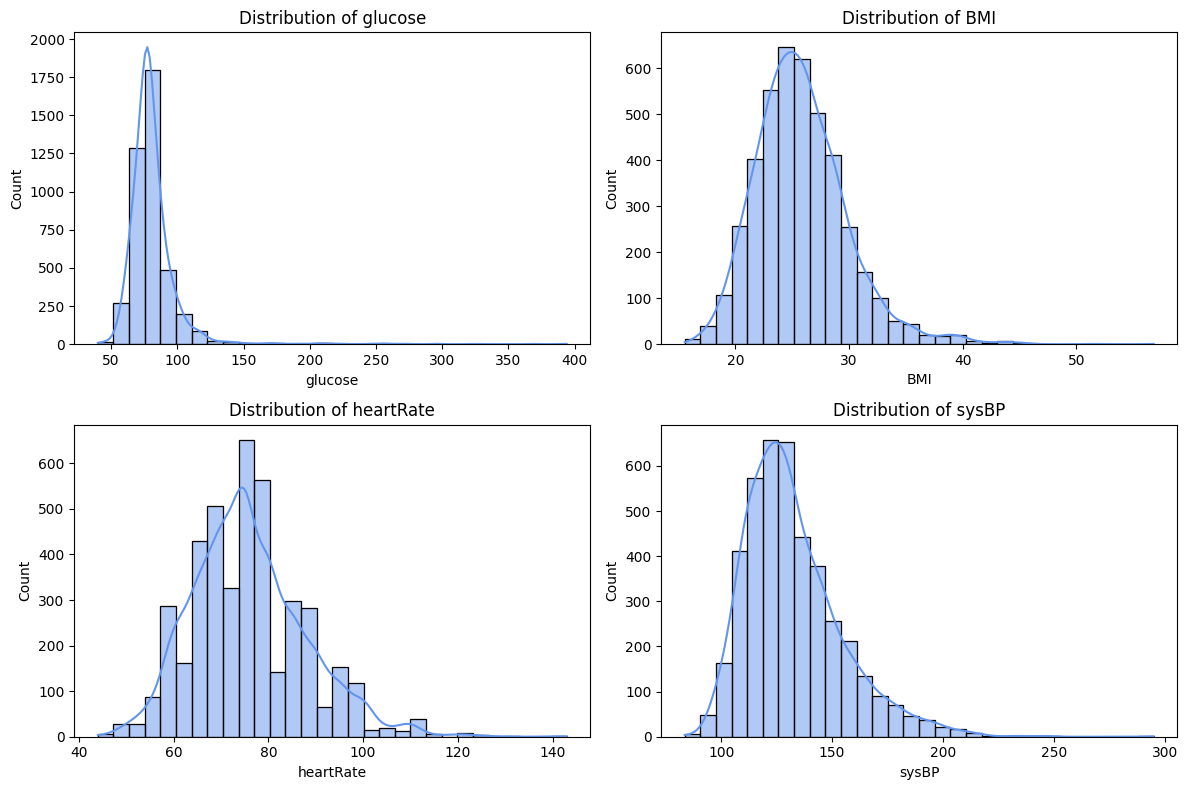

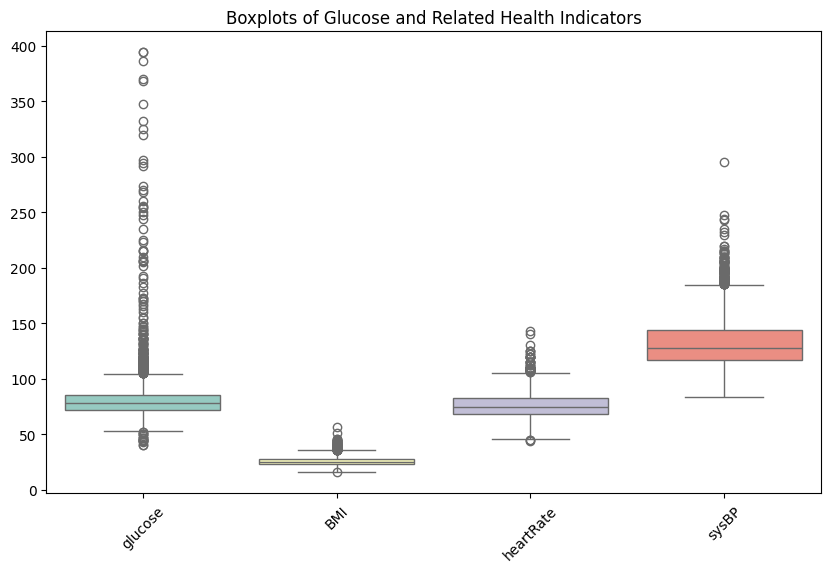

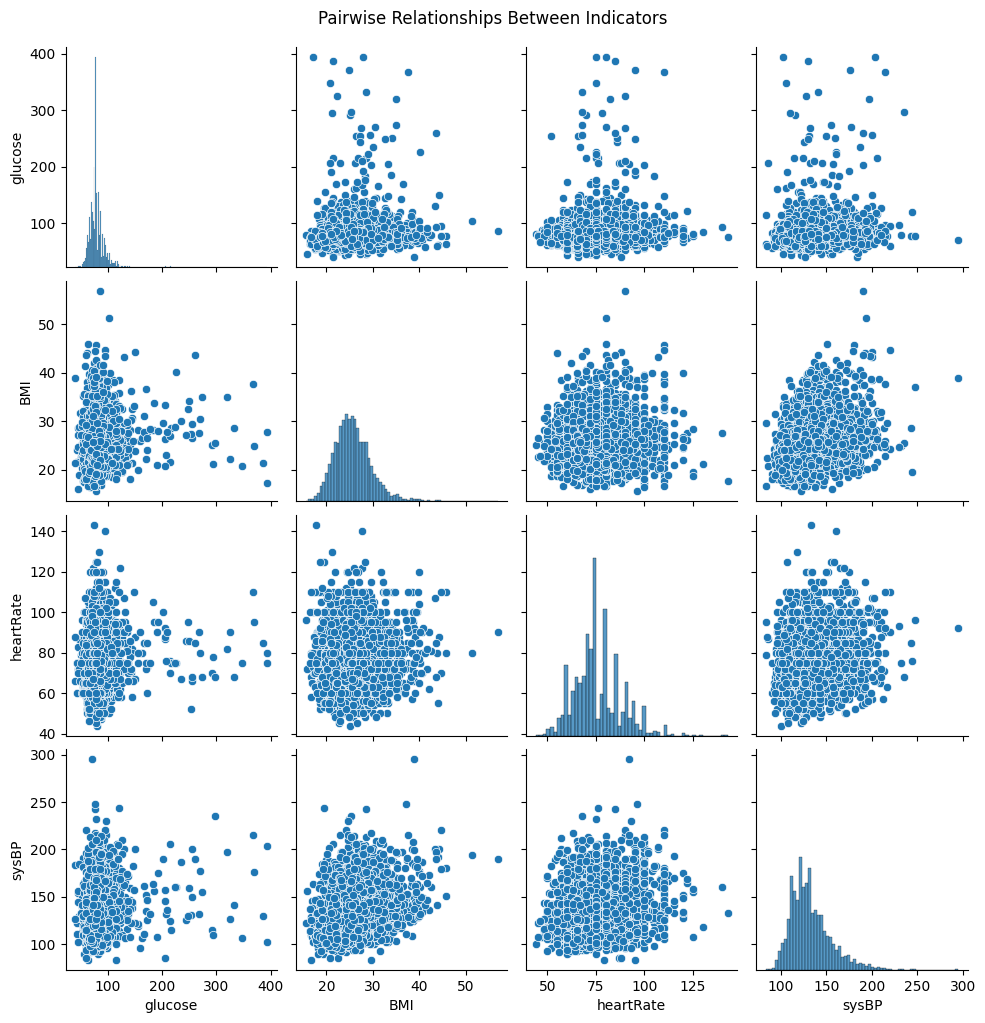

In [4]:
# Select health indicator columns
cols_to_plot = ['glucose', 'BMI', 'heartRate', 'sysBP']

# Fill missing values (if any)
df[cols_to_plot] = df[cols_to_plot].fillna(df[cols_to_plot].median())

# 1. Histogram + KDE plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[cols_to_plot], palette='Set3')
plt.title('Boxplots of Glucose and Related Health Indicators')
plt.xticks(rotation=45)
plt.show()

# 3. Pairplot for correlation overview
sns.pairplot(df[cols_to_plot])
plt.suptitle('Pairwise Relationships Between Indicators', y=1.02)
plt.show()


In [8]:
print(df.columns.tolist())

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


<h2 style='color:darkblue; font-weight:bold;'>4.Perform feature selection and engineering</h2>

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Set the target column
target_col = 'TenYearCHD'

# Step 1: Drop rows with missing values (or use imputation if needed)
df = df.dropna()

# Step 2: Separate input features (X) and output label (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Step 3: Encode categorical variables if any (e.g., 'male')
label_encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = label_encoder.fit_transform(X[col])

# Step 4: Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 5: Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')  # you can set k=10 or other number
X_selected = selector.fit_transform(X_scaled, y)

# Step 6: Show feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values(by='Score', ascending=False)

print("🎯 Feature Selection Scores:")
print(feature_scores)

# Optional: Select top features
top_n = 10
top_features = feature_scores.head(top_n)['Feature'].tolist()
X_final = X_scaled[top_features]

print("\n✅ Final Selected Top Features:")
print(top_features)


🎯 Feature Selection Scores:
            Feature       Score       p-value
1               age  226.853168  5.573313e-50
10            sysBP  208.158627  4.217070e-46
7      prevalentHyp  137.799103  2.452591e-31
11            diaBP   91.160759  2.170620e-21
14          glucose   63.307530  2.251188e-15
8          diabetes   40.543047  2.127852e-10
0              male   33.358835  8.211735e-09
5            BPMeds   31.909790  1.720838e-08
9           totChol   28.512751  9.795875e-08
12              BMI   23.542049  1.266045e-06
6   prevalentStroke   16.259940  5.619014e-05
4        cigsPerDay   14.668063  1.300534e-04
2         education   12.196874  4.835855e-04
13        heartRate    2.214058  1.368330e-01
3     currentSmoker    1.603605  2.054627e-01

✅ Final Selected Top Features:
['age', 'sysBP', 'prevalentHyp', 'diaBP', 'glucose', 'diabetes', 'male', 'BPMeds', 'totChol', 'BMI']


<h2 style='color:darkblue; font-weight:bold;'>5.Train ML models</h2>

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Separate features and target
target_col = 'TenYearCHD'
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 2: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Train models

## Logistic Regression
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

## Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

## Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 5: Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8549528301886793
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.07      0.12       123

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848


Decision Tree Accuracy: 0.7488207547169812
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       725
           1       0.20      0.24      0.21       123

    accuracy                           0.75       848
   macro avg       0.53      0.54      0.53       848
weighted avg       0.77      0.75      0.76       848


Random Forest Accuracy: 0.8549528301886793
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.04      0.08       123

    accuracy                           0.85  

<h2 style='color:darkblue; font-weight:bold;'>6.Evaluate models using classification metrics</h2>


🔍 Logistic Regression Evaluation
Accuracy: 0.8549528301886793
Precision: 0.5
Recall: 0.06504065040650407
F1 Score: 0.11510791366906475
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.07      0.12       123

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848


🔍 Decision Tree Evaluation
Accuracy: 0.7488207547169812
Precision: 0.19594594594594594
Recall: 0.23577235772357724
F1 Score: 0.2140221402214022
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       725
           1       0.20      0.24      0.21       123

    accuracy                           0.75       848
   macro avg       0.53      0.54      0.53       848
weighted avg       0.77      0.75      0.76       848


🔍 Random Forest Evaluation
Accuracy: 0.8549528301886793
Precisio

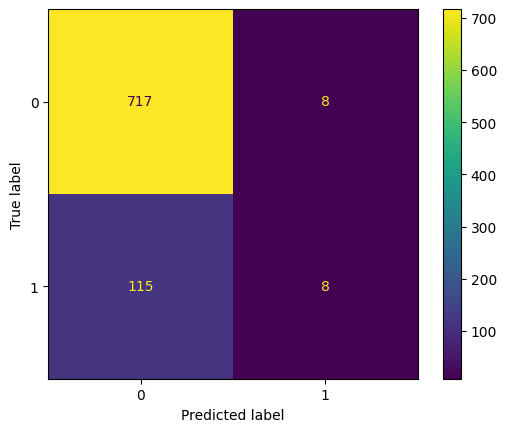

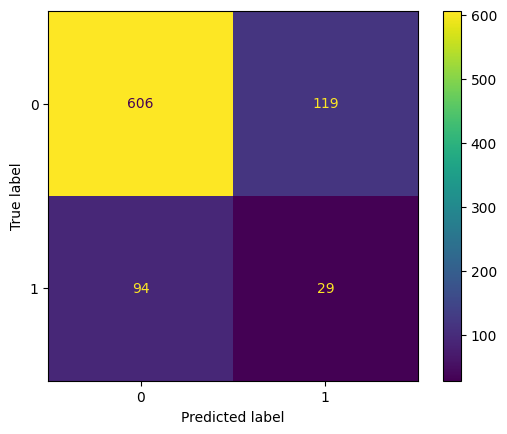

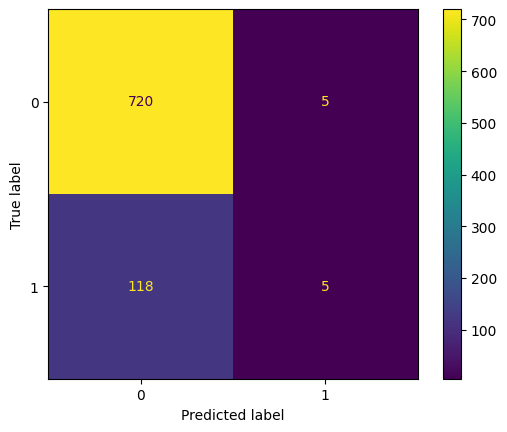

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Logistic Regression Evaluation
print("\n🔍 Logistic Regression Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot()

# Decision Tree Evaluation
print("\n🔍 Decision Tree Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt)).plot()

# Random Forest Evaluation
print("\n🔍 Random Forest Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()


<h2 style='color:darkblue; font-weight:bold;'>Predict Glucose Levels and Draw Insights</h2>


 Random Forest Regressor Evaluation:
RMSE: 19.30
R² Score: 0.29


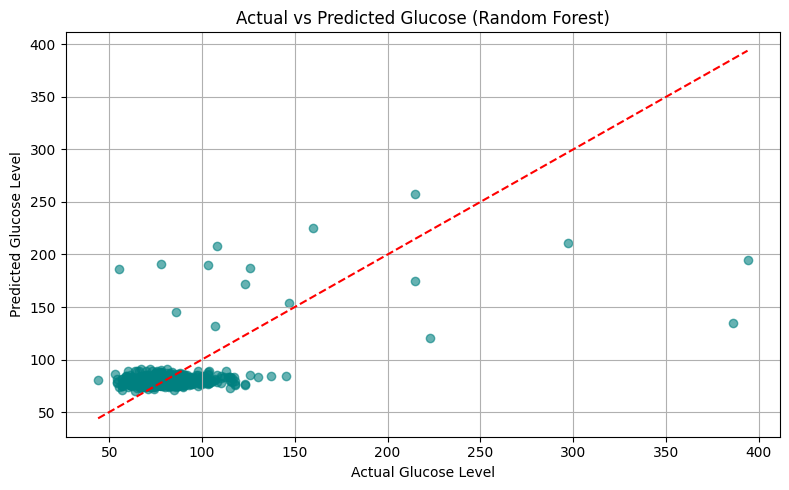


 Top Features Influencing Glucose Level:
diabetes      0.378656
diaBP         0.111724
sysBP         0.106267
BMI           0.092296
totChol       0.080022
age           0.071171
heartRate     0.067738
cigsPerDay    0.035938
education     0.029819
male          0.009051
dtype: float64


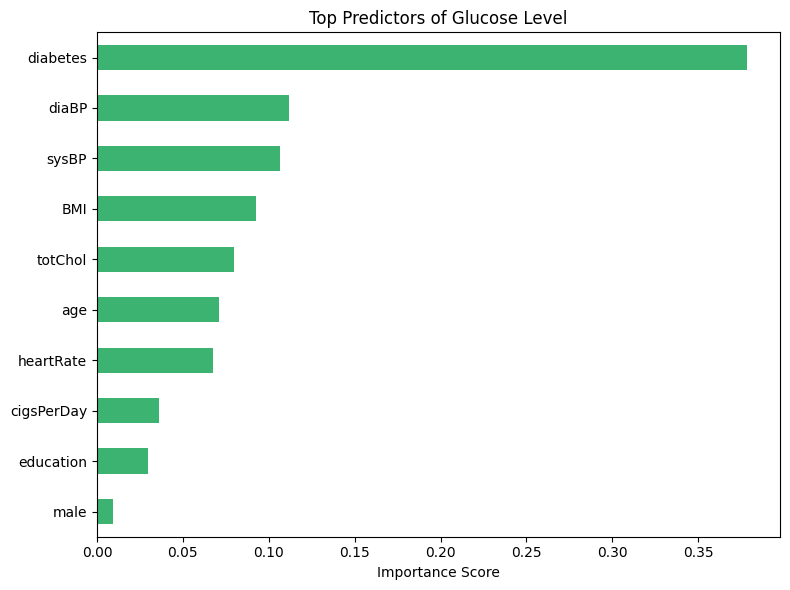

In [14]:
# Predict Glucose Levels and Draw Insights
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows where glucose is NaN
df_glucose = df.dropna(subset=['glucose'])

# Features and target
X_glucose = df_glucose.drop(columns=['glucose', 'TenYearCHD'])  # drop target cols
y_glucose = df_glucose['glucose']

# Train-test split
Xg_train, Xg_test, yg_train, yg_test = train_test_split(X_glucose, y_glucose, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(Xg_train, yg_train)
y_pred_rf = rf_reg.predict(Xg_test)

#  Evaluate the model
print("\n Random Forest Regressor Evaluation:")
rmse = np.sqrt(mean_squared_error(yg_test, y_pred_rf))
r2 = r2_score(yg_test, y_pred_rf)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted glucose
plt.figure(figsize=(8, 5))
plt.scatter(yg_test, y_pred_rf, alpha=0.6, color='teal')
plt.plot([yg_test.min(), yg_test.max()], [yg_test.min(), yg_test.max()], 'r--')
plt.xlabel("Actual Glucose Level")
plt.ylabel("Predicted Glucose Level")
plt.title("Actual vs Predicted Glucose (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Feature Importance
importances = pd.Series(rf_reg.feature_importances_, index=X_glucose.columns)
top_features = importances.sort_values(ascending=False).head(10)

print("\n Top Features Influencing Glucose Level:")
print(top_features)

# Plot feature importances
plt.figure(figsize=(8, 6))
top_features.plot(kind='barh', color='mediumseagreen')
plt.xlabel("Importance Score")
plt.title("Top Predictors of Glucose Level")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<h2 style='color:darkblue; font-weight:bold;'>Visualise the Model's Important Features and Performance</h2>

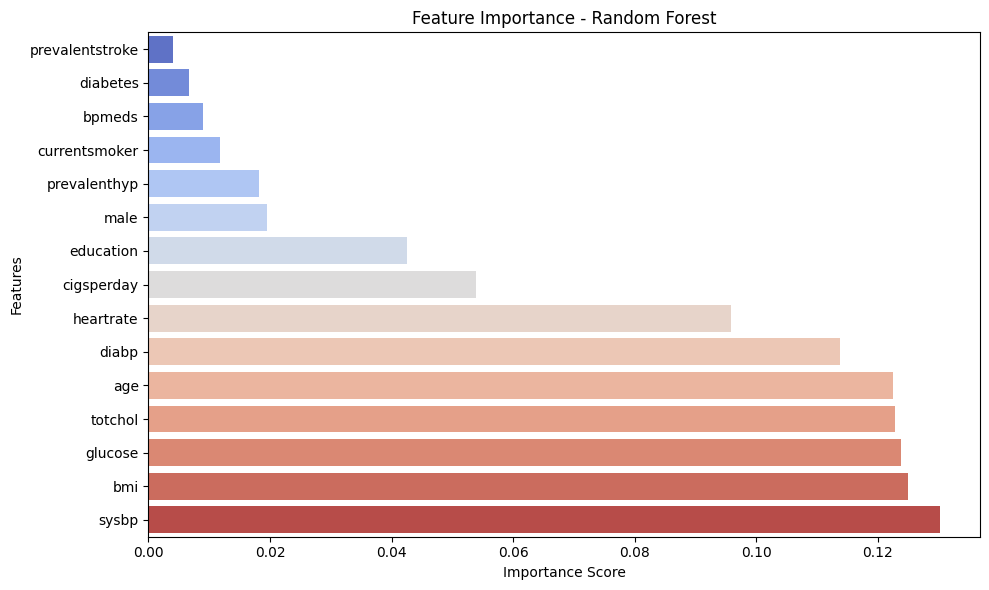

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.45      0.04      0.07       123

    accuracy                           0.85       848
   macro avg       0.66      0.52      0.50       848
weighted avg       0.80      0.85      0.80       848

Accuracy Score: 0.8537735849056604


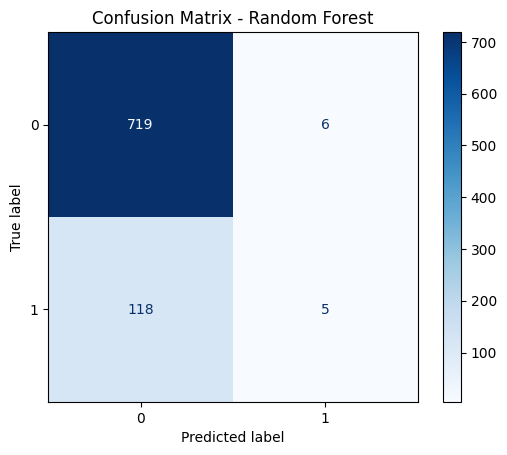

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


# Load your dataset
df = pd.read_csv('framingham.csv')  # Replace with your actual dataset path

# Ensure correct column name for target
df.columns = [col.lower() for col in df.columns]  # Convert all columns to lowercase
target_col = 'TenYearCHD'

# Drop rows with missing target
df = df.dropna(subset=[target_col])

# Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature Importance Visualization
importances = rf.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, hue=feat_importance.index, palette="coolwarm", dodge=False, legend=False)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Evaluate Performance
y_pred = rf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.
